In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [18]:
df = pd.read_csv('IPEDS_data.csv')
df

ID number                                               Name  year  \
0        100654                           Alabama A & M University  2013   
1        100663                University of Alabama at Birmingham  2013   
2        100690                                 Amridge University  2013   
3        100706                University of Alabama in Huntsville  2013   
4        100724                           Alabama State University  2013   
5        100751                          The University of Alabama  2013   
6        100812                            Athens State University  2013   
7        100830                    Auburn University at Montgomery  2013   
8        100858                                  Auburn University  2013   
9        100937                        Birmingham Southern College  2013   
10       101073                          Concordia College Alabama  2013   
11       101189                                Faulkner University  2013   
12       101435                                 Huntingdon College  2013   
13       101480                      Jacksonville State University  2013   
14       101541                                     Judson College  2013   
15       101587                         University of West Alabama  2013   
16       101675                                      Miles College  2013   
17       101693                               University of Mobile  2013   
18       101709                           University of Montevallo  2013   
19       101879                        University of North Alabama  2013   
20       101912                                 Oakwood University  2013   
21       102049                                 Samford University  2013   
22       102094                        University of South Alabama  2013   
23       102234                                Spring Hill College  2013   
24       102270                                   Stillman College  2013   
25       102298                                  Talladega College  2013   
26       102368                                    Troy University  2013   
27       102377                                Tuskegee University  2013   
28       102553                     University of Alaska Anchorage  2013   
29       102614                     University of Alaska Fairbanks  2013   
...         ...                                                ...   ...   
1504     434414                          Michigan Jewish Institute  2013   
1505     434539                                 City College-Miami  2013   
1506     438151                     Stevens-Henager College-Murray  2013   
1507     439288                  Johnson & Wales University-Denver  2013   
1508     440411                   Marlboro College-Graduate School  2013   
1509     441186  San Diego State University-Imperial Valley Campus  2013   
1510     441900                               Nevada State College  2013   
1511     441937        California State University-Channel Islands  2013   
1512     444167                        Baker College of Allen Park  2013   
1513     444990                        Flagler College-Tallahassee  2013   
1514     445267  Central Methodist University-College of Gradua...  2013   
1515     445708               Johnson & Wales University-Charlotte  2013   
1516     446048                               Ave Maria University  2013   
1517     446640    Harrisburg University of Science and Technology  2013   
1518     446677                      Stevens-Henager College-Logan  2013   
1519     446932                             Union Graduate College  2013   
1520     447689                           Georgia Gwinnett College  2013   
1521     448284      Doane College-Lincoln Grand Island and Master  2013   
1522     448309  Shorter University-College of Adult & Professi...  2013   
1523     448752                   College America-Colorado Springs  2013   
1524     448804                        The Robert B Mi

In [19]:
uark = df.loc[df['Name'] == 'University of Arkansas']
uark

ID number                    Name  year ZIP code  \
43     106397  University of Arkansas  2013    72701   

                               Highest degree offered        County name  \
43  Doctor's degree - research/scholarship and pro...  Washington County   

    Longitude location of institution  Latitude location of institution  \
43                         -94.178214                          36.06153   

   Religious affiliation Offers Less than one year certificate  ...  \
43        Not applicable                            Implied no  ...   

   Percent of freshmen  receiving federal grant aid  \
43                                             22.0   

   Percent of freshmen receiving Pell grants  \
43                                      22.0   

   Percent of freshmen receiving other federal grant aid  \
43                                                5.0      

   Percent of freshmen receiving state/local grant aid  \
43                                               50.0    

   Percent of freshmen receiving institutional grant aid  \
43                                               35.0      

   Percent of freshmen receiving student loan aid  \
43                                           41.0   

   Percent of freshmen receiving federal student loans  \
43                                               41.0    

   Percent of freshmen receiving other loan aid  \
43                                          3.0   

   Endowment assets (year end) per FTE enrollment (GASB)  \
43                                            36209.0      

   Endowment assets (year end) per FTE enrollment (FASB)  
43                                                NaN     

[1 rows x 145 columns]

In [20]:
columns = df.columns
for col in columns:
    print(col)

ID number
Name
year
ZIP code
Highest degree offered
County name
Longitude location of institution
Latitude location of institution
Religious affiliation
Offers Less than one year certificate
Offers One but less than two years certificate
Offers Associate's degree
Offers Two but less than 4 years certificate
Offers Bachelor's degree
Offers Postbaccalaureate certificate
Offers Master's degree
Offers Post-master's certificate
Offers Doctor's degree - research/scholarship
Offers Doctor's degree - professional practice
Offers Doctor's degree - other
Offers Other degree
Applicants total
Admissions total
Enrolled total
Percent of freshmen submitting SAT scores
Percent of freshmen submitting ACT scores
SAT Critical Reading 25th percentile score
SAT Critical Reading 75th percentile score
SAT Math 25th percentile score
SAT Math 75th percentile score
SAT Writing 25th percentile score
SAT Writing 75th percentile score
ACT Composite 25th percentile score
ACT Composite 75th percentile score
Estimate

In [21]:
my_columns = ['Name',
              'Percent admitted - total',
              'ACT Composite 75th percentile score',
              'Graduation rate - Bachelor degree within 4 years, total',
              'Graduation rate - Bachelor degree within 6 years, total',
              'Total  enrollment']
uark[my_columns]

Name  Percent admitted - total  \
43  University of Arkansas                      59.0   

    ACT Composite 75th percentile score  \
43                                 28.0   

    Graduation rate - Bachelor degree within 4 years, total  \
43                                               37.0         

    Graduation rate - Bachelor degree within 6 years, total  Total  enrollment  
43                                               60.0                  25341.0

In [22]:
nerds = df.loc[df['Percent admitted - total'] < 20]
nerds[my_columns]

Name  \
64                   California Institute of Technology   
81                    University of California-Berkeley   
94                            Claremont McKenna College   
100                                 Harvey Mudd College   
122                                      Pitzer College   
124                                      Pomona College   
179                                     Yale University   
189                               Georgetown University   
289                               University of Chicago   
320                             Northwestern University   
481                                     Bowdoin College   
503                            Johns Hopkins University   
522                                     Amherst College   
544                                  Harvard University   
551               Massachusetts Institute of Technology   
570                                    Tufts University   
577                                    Williams College   
663                                        Rust College   
690                               College of the Ozarks   
698                   Washington University in St Louis   
734                                   Dartmouth College   
760                                Princeton University   
793         Columbia University in the City of New York   
795   Cooper Union for the Advancement of Science an...   
796                                  Cornell University   
910                                     Duke University   
1140                         University of Pennsylvania   
1158                                 Swarthmore College   
1172                                   Brown University   
1257                              Vanderbilt University   
1292                                    Rice University   
1348                                 Middlebury College   
1396                      Washington and Lee University   
1469                                Stanford University   

      Percent admitted - total  ACT Composite 75th percentile score  \
64                        11.0                                 35.0   
81                        18.0                                 33.0   
94                        12.0                                 33.0   
100                       18.0                                 35.0   
122                       15.0                                  NaN   
124                       14.0                                 34.0   
179                        7.0                                 35.0   
189                       17.0                                 33.0   
289                        9.0                                 35.0   
320                       15.0                                 34.0   
481                       15.0                                 33.0   
503                       18.0                                 34.0   
522                       14.0                                 34.0   
544                        6.0                                 35.0   
551                        8.0                                 35.0   
570                       19.0                                 33.0   
577                       17.0                                 34.0   
663                       14.0                                 14.0   
690                       13.0                                 25.0   
698                       16.0                                 34.0   
734                       10.0                                 34.0   
760                        7.0                                 35.0   
793                        7.0                                 34.0   
795                        8.0                                 33.0   
796                       16.0                                 34.0   
910                       13.0                                 34.0   
1140                      12.0                                 34.0 

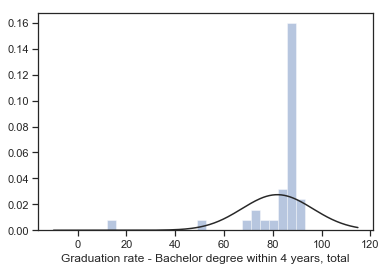

In [23]:
from scipy.stats import norm

sns.set(style="ticks")
#sns.distplot(df['Graduation rate - Bachelor degree within 4 years, total'], kde=False, fit=norm, bins=22)
sns.distplot(nerds['Graduation rate - Bachelor degree within 4 years, total'], bins=22,kde=False, fit=norm)

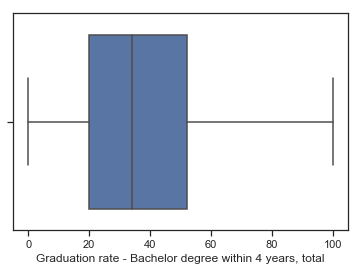

In [24]:
sns.boxplot(x=df['Graduation rate - Bachelor degree within 4 years, total'])

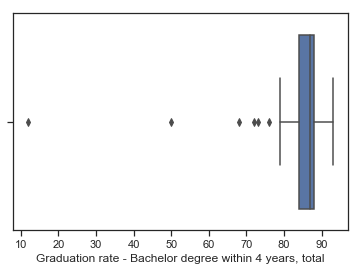

In [25]:
sns.boxplot(nerds['Graduation rate - Bachelor degree within 4 years, total'])

In [26]:
print(np.average(nerds['Graduation rate - Bachelor degree within 4 years, total']))
print(np.median(nerds['Graduation rate - Bachelor degree within 4 years, total']))

81.8529411764706
87.0


In [27]:
# We begin to tweak the college data so that it is
# ready to be trained on / tested with a decision tree.
df = df.fillna(0) # Fill all empty / "not a number" values with 0

# Remove these columns / parameters because either they are too
# hard for the tree to interpret or are useless for detemrining
# the label.
columns_to_drop = [
    'ID number',
    'Name',
    'year',
    'ZIP code',
    'Highest degree offered',
    'County name',
    'Longitude location of institution',
    'Latitude location of institution',
    'Religious affiliation',
    'State abbreviation',
    'FIPS state code',
    'Geographic region',
    'Sector of institution',
    'Level of institution',
    'Control of institution',
    'Degree of urbanization (Urban-centric locale)',
    'Carnegie Classification 2010: Basic'
]

# Yes / Implied No / No values that need to be
# changed to numbers (1's and 0's).
columns_to_binarize = [
    'Offers Less than one year certificate',
    'Offers One but less than two years certificate',
    'Offers Associate\'s degree',
    'Offers Two but less than 4 years certificate',
    'Offers Bachelor\'s degree',
    'Offers Postbaccalaureate certificate',
    'Offers Master\'s degree',
    'Offers Post-master\'s certificate',
    'Offers Doctor\'s degree - research/scholarship',
    'Offers Doctor\'s degree - professional practice',
    'Offers Doctor\'s degree - other',
    'Offers Other degree',
    'Historically Black College or University',
    'Tribal college',
]

label_column = ['Percent admitted - total']

for col in columns_to_binarize:
    df[col].replace(('Yes', 'Implied no', 'No'), (1, 0, 0), inplace=True)

In [28]:
# Label 0 : < 50% admit rate (low)
# Label 1 : > 50% admit rate (high)

rates = df[label_column].to_numpy()
rate_categories = [0 if r < 50 else 1 for r in rates]
# rate_categories

In [29]:
# Split into label (y) and parameters (X).
y = rate_categories # y = df[label_column]
X = df.drop(columns=columns_to_drop)
X = X.drop(columns=label_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
mysvc = LinearSVC()
mysvc = mysvc.fit(X_train, y_train)
mysvc = mysvc.predict(X_test)

def pred_to_actual(pred):
    if pred == 0:
        return 'low'
    else: # aka pred == 1
        return 'high'

print('Key'.ljust(5), 'Name'.ljust(36), 'Pred'.ljust(6), 'Actual')
for index, (key, sample) in enumerate(X_test.iterrows()):
    print(str(key).ljust(5), 
          df['Name'][key][:34].ljust(36), 
          pred_to_actual(mysvc[index]).ljust(6), 
          str(df['Percent admitted - total'][key]).ljust(6)
     )

('Key  ', 'Name                                ', 'Pred  ', 'Actual')
('161  ', 'University of Bridgeport            ', 'high  ', '64.0  ')
('980  ', 'Kenyon College                      ', 'low   ', '38.0  ')
('1393 ', 'Virginia State University           ', 'high  ', '95.0  ')
('1177 ', 'Rhode Island College                ', 'high  ', '69.0  ')
('124  ', 'Pomona College                      ', 'low   ', '14.0  ')
('463  ', 'Louisiana State University-Shrevep  ', 'high  ', '83.0  ')
('522  ', 'Amherst College                     ', 'low   ', '14.0  ')
('1041 ', 'Concordia University-Portland       ', 'high  ', '56.0  ')
('941  ', 'Mid-Atlantic Christian University   ', 'high  ', '41.0  ')
('127  ', 'University of San Diego             ', 'low   ', '49.0  ')
('627  ', 'Concordia University-Saint Paul     ', 'low   ', '52.0  ')
('1021 ', 'Cameron University                  ', 'low   ', '0.0   ')
('1112 ', 'Millersville University of Pennsyl  ', 'high  ', '72.0  ')
('1288 ', 'The Unive

/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [46]:
#print(preds)
#print(y_test)


correct = 0.0
for pred, act in zip(mysvc, y_test):
    if pred == act:
        correct += 1

print('Accuracy:', (correct/len(mysvc)) * 100, '%')

('Accuracy:', 91.85667752442997, '%')
